In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

In [3]:
df = os.path.join("/content/drive/MyDrive/sales_menu_cleaned.xlsx")
df = pd.read_excel(df)
df.head()

,timestamp,Date,day_name,Time,Category,Item,Qty,Gross Sales,Discounts,Net Sales,...,hour,soup_count_11_12,salad_count_11_12,empanada_count_11_12,soup_count_12_1,salad_count_12_1,empanada_count_12_1,soup_count_1_2,salad_count_1_2,empanada_count_1_2
0,2023-09-01 11:04:07,2023-09-01,Friday,11:04:07,Soup/Salad,Soup - Non-Dickinson Student or Non-Meal Plan,1,5.0,0.0,5.0,...,11,13.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-09-01 11:04:36,2023-09-01,Friday,11:04:36,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,...,11,13.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-09-01 11:05:24,2023-09-01,Friday,11:05:24,Soup/Salad,1/2 Soup - 1/2 Salad - Dickinson Student w. Me...,1,3.0,0.0,3.0,...,11,13.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-09-01 11:06:12,2023-09-01,Friday,11:06:12,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,...,11,13.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-09-01 11:06:46,2023-09-01,Friday,11:06:46,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,...,11,13.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Preparing the data
df = df.groupby(['Date','hour']).agg({
    'Qty': 'sum'
}).reset_index()

df.head()

,Date,hour,Qty
0,2023-09-01,11,26
1,2023-09-01,12,39
2,2023-09-01,13,14
3,2023-09-04,11,28
4,2023-09-04,12,32


In [5]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract numerical features from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = df.drop(columns=['Date'])

df.head()

,hour,Qty,Month,Day
0,11,26,9,1
1,12,39,9,1
2,13,14,9,1
3,11,28,9,4
4,12,32,9,4


In [6]:
# Drop the original 'Date' column as it's no longer needed
X = df.drop(columns='Qty')
y = df['Qty']

X = np.asarray(X)
y = np.asarray(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

print(X)
print(y)

reg = linear_model.LinearRegression()
reg.fit(X, y)

X shape: (547, 3)
y shape: (547,)
[[11  9  1]
 [12  9  1]
 [13  9  1]
 ...
 [11 10 29]
 [12 10 29]
 [13 10 29]]
[ 26  39  14  28  32  13  34  25   3   1  67  45   6  31  22   5  28  52
  11  58  38   1  38  28  13   2  75  69  16  36  34  12  49  35   8  33
  49   7   1  39  45  13  92  55  19  41  33   8  32  35  24  44  51  15
  37  43  10   1  78  58   8  38  24  18   1  21  36  16  32  49  12   1
  36  33  11 103  45  13  49  36  11   1  40  34  21   1  47  47  23  27
  45  12   1  94  58  43  18  14  63  40  16  88  45  14  33  32   8  39
  47  16  52  42   9  36  33   7  87  48   8   2  38  22  14   1  30  36
  13  28  24  11  36  27  11  74  49  11  27  21  10   1  25  24  15   2
   1   1  35  43  16  44  23   6  88  51  18  60  19  11  27  40  18  30
  19   9  45  34   7 119  17   7  36  36   8  31  29  17  32  27   8  16
  12   7  24  43  18  38  32   8  81  49   6  44  21  11  25  26  16  39
  55   5  26  10  10  74  43  20  38  24   6  32  33   8  14  34   5  25
  19   3  63

LinearRegression()

In [7]:
reg.coef_

array([-11.63816894,   0.28905246,   0.01308639])

In [8]:
reg.intercept_

166.9709984127409

In [9]:
reg.score(X, y)

0.24477004666010937

In [10]:
reg.predict([[12, 9, 1]])

array([29.92752963])

In [11]:
dfpath = os.path.join("/content/drive/MyDrive/sales_menu_cleaned_row_level.xlsx")
df = pd.read_excel(dfpath)
df.head()

,timestamp,Date,day_name,Time,Category,Item,Qty,Gross Sales,Discounts,Net Sales,...,Day,Soup,Notes,Salad,Empanada,date,year,salad,soup,emp
0,2023-09-01 11:04:07,2023-09-01,Friday,11:04:07,Soup/Salad,Soup - Non-Dickinson Student or Non-Meal Plan,1,5.0,0.0,5.0,...,Fri,Elote Corn,nf,NaN,NaN,2023-09-01,2023,0.0,1.0,0
1,2023-09-01 11:04:36,2023-09-01,Friday,11:04:36,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,...,Fri,Elote Corn,nf,NaN,NaN,2023-09-01,2023,0.0,1.0,0
2,2023-09-01 11:05:24,2023-09-01,Friday,11:05:24,Soup/Salad,1/2 Soup - 1/2 Salad - Dickinson Student w. Me...,1,3.0,0.0,3.0,...,Fri,Elote Corn,nf,Mujadara Bowls w/Parsley-Tahini dressing,NaN,2023-09-01,2023,0.5,0.5,0
3,2023-09-01 11:06:12,2023-09-01,Friday,11:06:12,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,...,Fri,Elote Corn,nf,NaN,NaN,2023-09-01,2023,0.0,1.0,0
4,2023-09-01 11:06:46,2023-09-01,Friday,11:06:46,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,...,Fri,Elote Corn,nf,NaN,NaN,2023-09-01,2023,0.0,1.0,0


In [12]:
df['Year'] = df['timestamp'].dt.year
df['Month'] = df['timestamp'].dt.month
df['Day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour

In [13]:
# Preparing the data
df = df.groupby(['Year', 'Month', 'Day', 'hour']).agg({
    'salad': 'sum',
    'soup': 'sum',
    'emp': 'sum'
}).reset_index()

df.head()

,Year,Month,Day,hour,salad,soup,emp
0,2023,9,1,11,9.5,13.5,0
1,2023,9,1,12,16.0,23.0,0
2,2023,9,1,13,4.5,9.5,0
3,2023,9,4,11,13.5,13.5,0
4,2023,9,4,12,14.5,17.5,0


In [14]:
X = df[['Year', 'Month', 'Day', 'hour']]
y = df[['salad', 'soup', 'emp']]

X = np.asarray(X)
y = np.asarray(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

print(X)
print(y)

X shape: (547, 4)
y shape: (547, 3)
[[2023    9    1   11]
 [2023    9    1   12]
 [2023    9    1   13]
 ...
 [2024   10   29   11]
 [2024   10   29   12]
 [2024   10   29   13]]
[[ 9.5 13.5  0. ]
 [16.  23.   0. ]
 [ 4.5  9.5  0. ]
 ...
 [34.5 43.5  0. ]
 [21.  22.   0. ]
 [ 5.5  6.5  0. ]]


In [15]:
reg = linear_model.LinearRegression()
reg.fit(X, y)

LinearRegression()

In [16]:
reg.score(X, y)

0.48820627938411915

In [17]:
reg.predict([[2023, 9, 1, 12]])

array([[11.18147228, 14.72476404,  0.        ]])

In [45]:
dfpath = os.path.join(
    "/content/drive/MyDrive/Copy of sales_menu_encoded.xlsx"
)

weatherdf = os.path.join(
    "/content/drive/MyDrive/weather1.xlsx"
)
df = pd.read_excel(dfpath)
df1 = pd.read_excel(weatherdf)
df.head()
df1.head()

,Year,Month,Day,hour,salad,soup,emp,salads_encoded,soups_encoded,emp_encoded,Rain
0,2023,9,1,11,9.5,13.5,0,10,8,0,NaN
1,2023,9,1,12,16.0,23.0,0,10,8,0,NaN
2,2023,9,1,13,4.5,9.5,0,10,8,0,NaN
3,2023,9,4,11,13.5,13.5,0,3,11,0,NaN
4,2023,9,4,12,14.5,17.5,0,3,11,0,NaN


In [19]:
df.replace({
    'salads_encoded': {21: np.nan},
    'soups_encoded': {29: np.nan},
    'emp_encoded': {6: np.nan}
}, inplace=True)

df.head()

,timestamp,Date,day_name,Time,Category,Item,Qty,Gross Sales,Discounts,Net Sales,...,Day,Notes,Empanada,date,salad,soup,emp,salads_encoded,soups_encoded,emp_encoded
0,2023-09-01 11:04:07,2023-09-01,Friday,11:04:07,Soup/Salad,Soup - Non-Dickinson Student or Non-Meal Plan,1,5.0,0.0,5.0,...,Fri,nf,NaN,2023-09-01,0.0,1.0,0,NaN,8.0,NaN
1,2023-09-01 11:04:36,2023-09-01,Friday,11:04:36,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,...,Fri,nf,NaN,2023-09-01,0.0,1.0,0,NaN,8.0,NaN
2,2023-09-01 11:05:24,2023-09-01,Friday,11:05:24,Soup/Salad,1/2 Soup - 1/2 Salad - Dickinson Student w. Me...,1,3.0,0.0,3.0,...,Fri,nf,NaN,2023-09-01,0.5,0.5,0,10.0,8.0,NaN
3,2023-09-01 11:06:12,2023-09-01,Friday,11:06:12,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,...,Fri,nf,NaN,2023-09-01,0.0,1.0,0,NaN,8.0,NaN
4,2023-09-01 11:06:46,2023-09-01,Friday,11:06:46,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,...,Fri,nf,NaN,2023-09-01,0.0,1.0,0,NaN,8.0,NaN


In [46]:
df['Year'] = df['timestamp'].dt.year
df['Month'] = df['timestamp'].dt.month
df['Day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour

In [48]:
agg_functions = {
    'salad': 'sum',
    'soup': 'sum',
    'emp': 'sum',
    'salads_encoded': 'mean',
    'soups_encoded': 'mean',
    'emp_encoded': 'mean'
}

df = df.groupby(['Year', 'Month', 'Day', 'hour']).agg(agg_functions).reset_index()

df.head()

df1 = df1.drop(columns=['salad', 'soup', 'emp', 'salads_encoded', 'soups_encoded', 'emp_encoded'])
df1.head()

df = pd.merge(df, df1, on=['Year', 'Month', 'Day', 'hour'], how='left')

df['rain'] = df['Rain'].fillna(0)
df.drop(columns=['Rain'], inplace=True)
df.head()


,Year,Month,Day,hour,salad,soup,emp,salads_encoded,soups_encoded,emp_encoded,rain
0,2023,9,1,11,9.5,13.5,0,14.304348,12.565217,6.0,0.0
1,2023,9,1,12,16.0,23.0,0,15.076923,13.923077,6.0,0.0
2,2023,9,1,13,4.5,9.5,0,15.500000,11.000000,6.0,0.0
3,2023,9,4,11,13.5,13.5,0,7.666667,15.666667,6.0,0.0
4,2023,9,4,12,14.5,17.5,0,8.625000,14.937500,6.0,0.0


In [22]:
# Export df as excel
df.to_excel(
    "/content/drive/MyDrive/sales_menu_encoded_agg.xlsx",
    index=False
)

In [23]:
# make sure the features are correctly aggregated
df['salads_encoded'].value_counts()

,count
salads_encoded,
9.0,86
3.0,76
6.0,33
19.0,33
16.0,31
12.0,29
13.0,27
4.0,21
18.0,16


In [24]:
df.fillna(0, inplace=True)
df.head()

,Year,Month,Day,hour,salad,soup,emp,salads_encoded,soups_encoded,emp_encoded,rain
0,2023,9,1,11,9.5,13.5,0,10.0,8.0,0.0,0.0
1,2023,9,1,12,16.0,23.0,0,10.0,8.0,0.0,0.0
2,2023,9,1,13,4.5,9.5,0,10.0,8.0,0.0,0.0
3,2023,9,4,11,13.5,13.5,0,3.0,11.0,0.0,0.0
4,2023,9,4,12,14.5,17.5,0,3.0,11.0,0.0,0.0


In [25]:
X = df[[
    'Year', 'Month', 'Day', 'hour', 'salads_encoded', 'soups_encoded', 'emp_encoded', 'rain'
    ]]
y = df[['salad', 'soup', 'emp']]

X = np.asarray(X)
y = np.asarray(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

print(X)
print(y)

X shape: (547, 8)
y shape: (547, 3)
[[2.023e+03 9.000e+00 1.000e+00 ... 8.000e+00 0.000e+00 0.000e+00]
 [2.023e+03 9.000e+00 1.000e+00 ... 8.000e+00 0.000e+00 0.000e+00]
 [2.023e+03 9.000e+00 1.000e+00 ... 8.000e+00 0.000e+00 0.000e+00]
 ...
 [2.024e+03 1.000e+01 2.900e+01 ... 6.000e+00 0.000e+00 0.000e+00]
 [2.024e+03 1.000e+01 2.900e+01 ... 6.000e+00 0.000e+00 0.000e+00]
 [2.024e+03 1.000e+01 2.900e+01 ... 6.000e+00 0.000e+00 0.000e+00]]
[[ 9.5 13.5  0. ]
 [16.  23.   0. ]
 [ 4.5  9.5  0. ]
 ...
 [34.5 43.5  0. ]
 [21.  22.   0. ]
 [ 5.5  6.5  0. ]]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

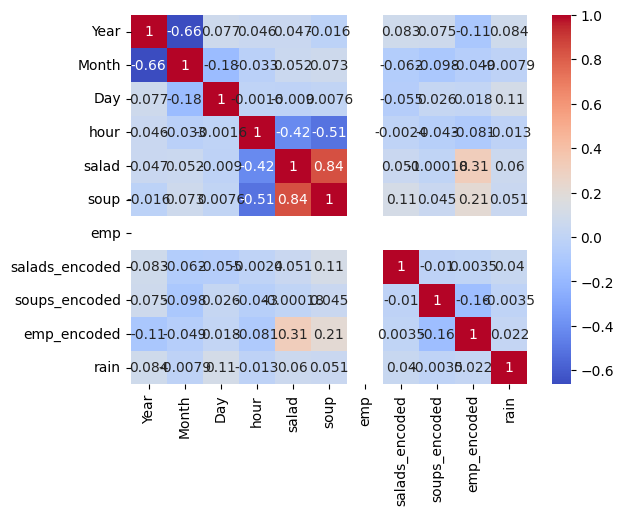

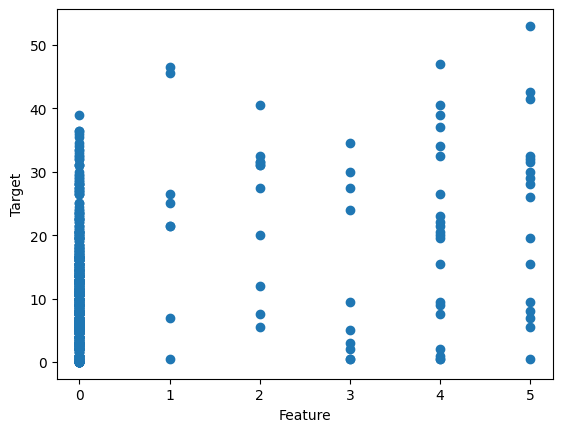

In [27]:
# Example: Visualize correlations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Scatter plot of feature vs. target
plt.scatter(df['emp_encoded'], df['salad'])
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [28]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print(f"Training R2 Score: {r2_score(y_train, y_train_pred)}")
print(f"Testing R2 Score: {r2_score(y_test, y_test_pred)}")
print(f"Testing MSE: {mean_squared_error(y_test, y_test_pred)}")

Training R2 Score: 0.5279202246890823
Testing R2 Score: 0.5868428963551628
Testing MSE: 36.03859803547432


In [30]:
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [[ 2.4503434   2.45654231 -0.07098179 -3.81538753  0.46140492  0.65342308
   3.05388273  0.35480237]
 [ 1.66435041  2.04905059  0.09997086 -5.28692282  1.31449537  1.12614922
   2.38181703  0.44405306]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]
Model Intercept: [12.60411899 15.59038902  0.        ]


In [31]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5)
print("Ridge Cross-Validation Scores:", scores.mean())

print("Ridge Testing R²:", ridge.score(X_test_scaled, y_test))


Ridge Cross-Validation Scores: 0.5019915837738049
Ridge Testing R²: 0.5869678929814935


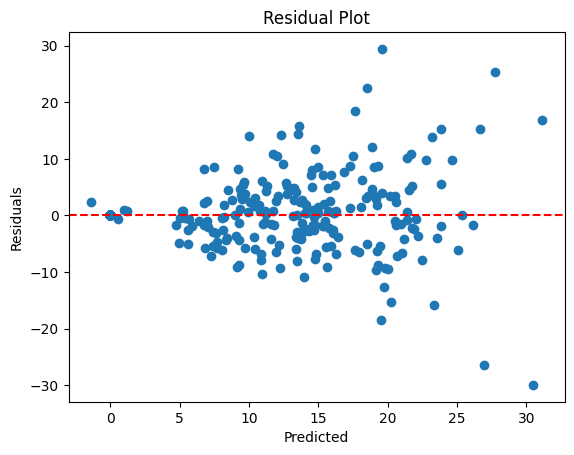

In [32]:
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [33]:
dfpath = os.path.join("/content/drive/MyDrive/enc_cleaned.xlsx")
df = pd.read_excel(dfpath)
df.head()

,timestamp,date,item,qty,gross_sale,discount,net_sales,tax,day,year,month,hour,salad_qty,emp_qty,soup_qty,soup_enc,salad_enc,emp_enc,day_of_week
0,2024-10-17 11:35:38,2024-10-17,Soup - Non-Dickinson Student or Non-Meal Plan,7,42.91,0.0,42.91,2.58,17,2024,10,11,0.0,7,7.0,8,11,4,2
1,2024-04-03 11:38:15,2024-04-03,1/2 Soup - 1/2 Salad - Non Dickinson Student o...,7,35.00,0.0,35.00,2.10,3,2024,4,11,3.5,7,3.5,14,8,3,4
2,2024-10-03 11:31:30,2024-10-03,Soup - Dickinson Student w. Meal Plan,6,18.00,0.0,18.00,0.00,3,2024,10,11,0.0,6,6.0,19,16,5,2
3,2024-10-01 11:21:50,2024-10-01,Soup - Dickinson Student w. Meal Plan,6,18.00,0.0,18.00,0.00,1,2024,10,11,0.0,6,6.0,8,16,5,3
4,2024-02-14 11:40:51,2024-02-14,1/2 Soup - 1/2 Salad - Non Dickinson Student o...,6,30.00,0.0,30.00,1.80,14,2024,2,11,3.0,6,3.0,25,13,1,4


In [34]:
df = df.sort_values(by='timestamp').reset_index(drop=True)
df

,timestamp,date,item,qty,gross_sale,discount,net_sales,tax,day,year,month,hour,salad_qty,emp_qty,soup_qty,soup_enc,salad_enc,emp_enc,day_of_week
0,2023-09-01 11:04:07,2023-09-01,Soup - Non-Dickinson Student or Non-Meal Plan,1,5.00,0.0,5.00,0.30,1,2023,9,11,0.0,0,1.0,8,10,6,0
1,2023-09-01 11:04:36,2023-09-01,Soup - Dickinson Student w. Meal Plan,1,3.00,0.0,3.00,0.00,1,2023,9,11,0.0,0,1.0,8,10,6,0
2,2023-09-01 11:05:24,2023-09-01,1/2 Soup - 1/2 Salad - Dickinson Student w. Me...,1,3.00,0.0,3.00,0.00,1,2023,9,11,0.5,0,0.5,8,10,6,0
3,2023-09-01 11:06:12,2023-09-01,Soup - Dickinson Student w. Meal Plan,1,3.00,0.0,3.00,0.00,1,2023,9,11,0.0,0,1.0,8,10,6,0
4,2023-09-01 11:06:46,2023-09-01,Soup - Dickinson Student w. Meal Plan,1,3.00,0.0,3.00,0.00,1,2023,9,11,0.0,0,1.0,8,10,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15550,2024-10-29 13:08:54,2024-10-29,1/2 Soup - 1/2 Salad - Dickinson Student w. Me...,1,5.00,0.0,5.00,0.00,29,2024,10,13,0.5,1,0.5,6,4,5,3
15551,2024-10-29 13:09:19,2024-10-29,1/2 Soup - 1/2 Salad - Dickinson Student w. Me...,1,5.00,0.0,5.00,0.00,29,2024,10,13,0.5,1,0.5,6,4,5,3
15552,2024-10-29 13:10:34,2024-10-29,1/2 Soup - 1/2 Salad - Non Dickinson Student o...,1,6.13,0.0,6.13,0.37,29,2024,10,13,0.5,1,0.5,6,4,5,3
15553,2024-10-29 13:12:22,2024-10-29,1/2 Soup - 1/2 Salad - Non Dickinson Student o...,1,6.13,0.0,6.13,0.37,29,2024,10,13,0.5,1,0.5,6,4,5,3


In [35]:
# # Convert timestamp to datetime (if not already done)
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# # Convert to Unix timestamp (seconds since epoch)
# df['timestamp_numeric'] = df['timestamp'].astype('int64') // 10**9

# # Check result
# print(df[['timestamp', 'timestamp_numeric']])


In [36]:
agg_functions = {
    'salad_qty': 'sum',
    'soup_qty': 'sum',
    'emp_qty': 'sum',
    'salad_enc': 'mean',
    'soup_enc': 'mean',
    'emp_enc': 'mean',
    'day_of_week': 'mean'
}

df = df.groupby(['year', 'month', 'day', 'hour']).agg(agg_functions).reset_index()

df.head()

,year,month,day,hour,salad_qty,soup_qty,emp_qty,salad_enc,soup_enc,emp_enc,day_of_week
0,2023,9,1,11,10.0,16.0,0,10.0,8.0,6.0,0.0
1,2023,9,1,12,16.0,23.0,0,10.0,8.0,6.0,0.0
2,2023,9,1,13,4.5,9.5,0,10.0,8.0,6.0,0.0
3,2023,9,4,11,14.5,13.5,0,3.0,11.0,6.0,1.0
4,2023,9,4,12,14.5,17.5,0,3.0,11.0,6.0,1.0


In [37]:
X = df[[
    'year', 'month', 'day', 'day_of_week', 'hour', 'salad_enc', 'soup_enc', 'emp_enc'
    ]]
y = df[['salad_qty', 'soup_qty', 'emp_qty']]

X = np.asarray(X)
y = np.asarray(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

print(X)
print(y)

X shape: (547, 8)
y shape: (547, 3)
[[2.023e+03 9.000e+00 1.000e+00 ... 1.000e+01 8.000e+00 6.000e+00]
 [2.023e+03 9.000e+00 1.000e+00 ... 1.000e+01 8.000e+00 6.000e+00]
 [2.023e+03 9.000e+00 1.000e+00 ... 1.000e+01 8.000e+00 6.000e+00]
 ...
 [2.024e+03 1.000e+01 2.900e+01 ... 4.000e+00 6.000e+00 5.000e+00]
 [2.024e+03 1.000e+01 2.900e+01 ... 4.000e+00 6.000e+00 5.000e+00]
 [2.024e+03 1.000e+01 2.900e+01 ... 4.000e+00 6.000e+00 5.000e+00]]
[[10.  16.   0. ]
 [16.  23.   0. ]
 [ 4.5  9.5  0. ]
 ...
 [39.  48.  87. ]
 [22.  23.  45. ]
 [ 6.5  7.5 14. ]]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

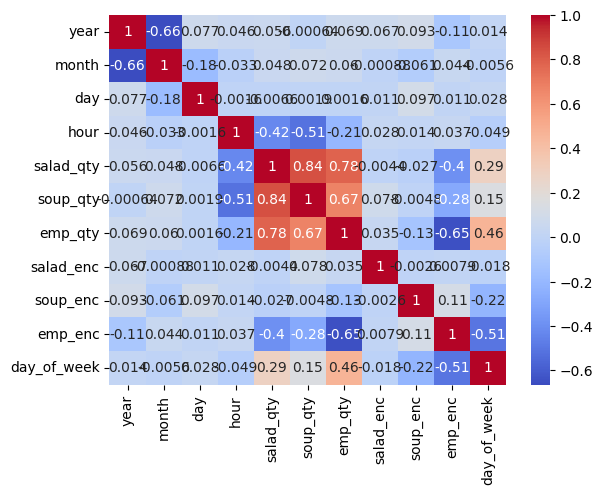

In [39]:
# Example: Visualize correlations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [40]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
print(f"Training R2 Score: {r2_score(y_train, y_train_pred)}")
print(f"Testing R2 Score: {r2_score(y_test, y_test_pred)}")
print(f"Testing MSE: {mean_squared_error(y_test, y_test_pred)}")

Training R2 Score: 0.39233269396542586
Testing R2 Score: 0.3918245599879245
Testing MSE: 132.75660932630126


In [42]:
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [[  1.39461197   1.5267844    0.05369096   0.89923668  -4.21559683
   -0.18003202   0.38089468  -3.5976661 ]
 [  0.9935569    1.3315984    0.10035858  -0.07071125  -5.89314651
    0.83082113   0.53999335  -3.46909664]
 [  3.39624238   4.19373374   0.95636491   4.17351686  -4.74623735
    0.54032628  -0.92571405 -13.94758928]]
Model Intercept: [13.24713959 16.51716247 12.05491991]


In [43]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5)
print("Ridge Cross-Validation Scores:", scores.mean())

print("Ridge Testing R²:", ridge.score(X_test_scaled, y_test))


Ridge Cross-Validation Scores: 0.313658148721858
Ridge Testing R²: 0.3917941497085576


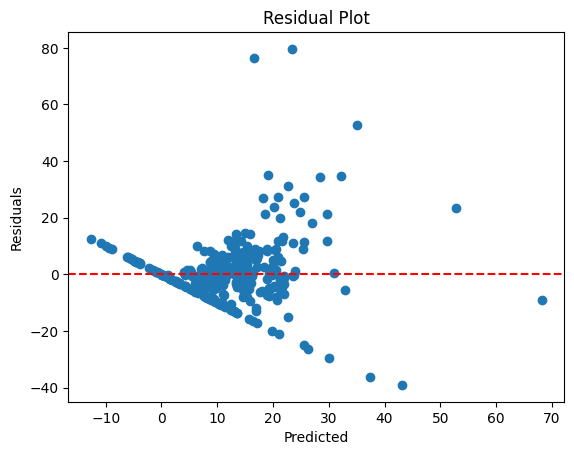

In [44]:
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [90]:
dfpath = os.path.join("/content/drive/MyDrive/enc_cleaned1.xlsx")
df = pd.read_excel(dfpath)
df.head()

,timestamp,date,item,qty,gross_sale,discount,net_sales,tax,day,year,month,hour,salad_qty,emp_qty,soup_qty,soup_enc,salad_enc,emp_enc,day_of_week
0,2024-10-17 11:35:38,2024-10-17,Soup - Non-Dickinson Student or Non-Meal Plan,7,42.91,0.0,42.91,2.58,17,2024,10,11,0.0,7,7.0,8,11,4,2
1,2024-04-03 11:38:15,2024-04-03,1/2 Soup - 1/2 Salad - Non Dickinson Student o...,7,35.00,0.0,35.00,2.10,3,2024,4,11,3.5,7,3.5,14,8,3,4
2,2024-10-03 11:31:30,2024-10-03,Soup - Dickinson Student w. Meal Plan,6,18.00,0.0,18.00,0.00,3,2024,10,11,0.0,6,6.0,19,16,5,2
3,2024-10-01 11:21:50,2024-10-01,Soup - Dickinson Student w. Meal Plan,6,18.00,0.0,18.00,0.00,1,2024,10,11,0.0,6,6.0,8,16,5,3
4,2024-02-14 11:40:51,2024-02-14,1/2 Soup - 1/2 Salad - Non Dickinson Student o...,6,30.00,0.0,30.00,1.80,14,2024,2,11,3.0,6,3.0,25,13,1,4


In [89]:
dfpath = os.path.join("/content/drive/MyDrive/weather1.xlsx")
df_weather = pd.read_excel(dfpath)
df_weather.head()

,Year,Month,Day,hour,Rain
0,2023,9,1,11,NaN
1,2023,9,1,12,NaN
2,2023,9,1,13,NaN
3,2023,9,4,11,NaN
4,2023,9,4,12,NaN


In [91]:
# Sort the rows by timestamp
df = df.sort_values(by='timestamp').reset_index(drop=True)

df.head()

,timestamp,date,item,qty,gross_sale,discount,net_sales,tax,day,year,month,hour,salad_qty,emp_qty,soup_qty,soup_enc,salad_enc,emp_enc,day_of_week
0,2023-09-01 11:04:07,2023-09-01,Soup - Non-Dickinson Student or Non-Meal Plan,1,5.0,0.0,5.0,0.3,1,2023,9,11,0.0,0,1.0,8,10,6,0
1,2023-09-01 11:04:36,2023-09-01,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,0.0,1,2023,9,11,0.0,0,1.0,8,10,6,0
2,2023-09-01 11:05:24,2023-09-01,1/2 Soup - 1/2 Salad - Dickinson Student w. Me...,1,3.0,0.0,3.0,0.0,1,2023,9,11,0.5,0,0.5,8,10,6,0
3,2023-09-01 11:06:12,2023-09-01,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,0.0,1,2023,9,11,0.0,0,1.0,8,10,6,0
4,2023-09-01 11:06:46,2023-09-01,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,0.0,1,2023,9,11,0.0,0,1.0,8,10,6,0


In [92]:
# Move year, month, day_of_week, hour columns next to timestamp
columns_to_move = ['year', 'month', 'day', 'day_of_week', 'hour']  # Changed 'day_name' to 'day_of_week'

# Reorder the columns to place them next to 'date'
columns = list(df.columns)
date_index = columns.index('date')  # Find the index of 'date'
# Remove the columns to move
for col in columns_to_move:
    if col in columns:  # Check if the column exists before removing
        columns.remove(col)
# Insert the columns after 'date'
for i, col in enumerate(columns_to_move):
    columns.insert(date_index + 1 + i, col)

# Reorder the DataFrame
df = df[columns]

# Display the reordered DataFrame structure
df.head(), df.columns.tolist()

(            timestamp       date  year  month  day  day_of_week  hour  \
 0 2023-09-01 11:04:07 2023-09-01  2023      9    1            0    11   
 1 2023-09-01 11:04:36 2023-09-01  2023      9    1            0    11   
 2 2023-09-01 11:05:24 2023-09-01  2023      9    1            0    11   
 3 2023-09-01 11:06:12 2023-09-01  2023      9    1            0    11   
 4 2023-09-01 11:06:46 2023-09-01  2023      9    1            0    11   
 
                                                 item  qty  gross_sale  \
 0      Soup - Non-Dickinson Student or Non-Meal Plan    1         5.0   
 1              Soup - Dickinson Student w. Meal Plan    1         3.0   
 2  1/2 Soup - 1/2 Salad - Dickinson Student w. Me...    1         3.0   
 3              Soup - Dickinson Student w. Meal Plan    1         3.0   
 4              Soup - Dickinson Student w. Meal Plan    1         3.0   
 
    discount  net_sales  tax  salad_qty  emp_qty  soup_qty  soup_enc  \
 0       0.0        5.0  0.3        

In [93]:
# Join df and df_weather
df_merged = pd.merge(df, df_weather, left_on=['year', 'month', 'day', 'hour'], right_on=['Year', 'Month', 'Day', 'hour'], how='left')
df_merged.head()

,timestamp,date,year,month,day,day_of_week,hour,item,qty,gross_sale,...,salad_qty,emp_qty,soup_qty,soup_enc,salad_enc,emp_enc,Year,Month,Day,Rain
0,2023-09-01 11:04:07,2023-09-01,2023,9,1,0,11,Soup - Non-Dickinson Student or Non-Meal Plan,1,5.0,...,0.0,0,1.0,8,10,6,2023,9,1,NaN
1,2023-09-01 11:04:36,2023-09-01,2023,9,1,0,11,Soup - Dickinson Student w. Meal Plan,1,3.0,...,0.0,0,1.0,8,10,6,2023,9,1,NaN
2,2023-09-01 11:05:24,2023-09-01,2023,9,1,0,11,1/2 Soup - 1/2 Salad - Dickinson Student w. Me...,1,3.0,...,0.5,0,0.5,8,10,6,2023,9,1,NaN
3,2023-09-01 11:06:12,2023-09-01,2023,9,1,0,11,Soup - Dickinson Student w. Meal Plan,1,3.0,...,0.0,0,1.0,8,10,6,2023,9,1,NaN
4,2023-09-01 11:06:46,2023-09-01,2023,9,1,0,11,Soup - Dickinson Student w. Meal Plan,1,3.0,...,0.0,0,1.0,8,10,6,2023,9,1,NaN


In [94]:
df_merged = df_merged.drop(columns=['Year', 'Month', 'Day'])
df_merged.head()

,timestamp,date,year,month,day,day_of_week,hour,item,qty,gross_sale,discount,net_sales,tax,salad_qty,emp_qty,soup_qty,soup_enc,salad_enc,emp_enc,Rain
0,2023-09-01 11:04:07,2023-09-01,2023,9,1,0,11,Soup - Non-Dickinson Student or Non-Meal Plan,1,5.0,0.0,5.0,0.3,0.0,0,1.0,8,10,6,NaN
1,2023-09-01 11:04:36,2023-09-01,2023,9,1,0,11,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,0.0,0.0,0,1.0,8,10,6,NaN
2,2023-09-01 11:05:24,2023-09-01,2023,9,1,0,11,1/2 Soup - 1/2 Salad - Dickinson Student w. Me...,1,3.0,0.0,3.0,0.0,0.5,0,0.5,8,10,6,NaN
3,2023-09-01 11:06:12,2023-09-01,2023,9,1,0,11,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,0.0,0.0,0,1.0,8,10,6,NaN
4,2023-09-01 11:06:46,2023-09-01,2023,9,1,0,11,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,0.0,0.0,0,1.0,8,10,6,NaN


In [95]:
# Change null values in weather to 0 with no decimals
df_merged['Rain'] = df_merged['Rain'].fillna(0).astype(int)
df_merged.Rain.value_counts()

,count
Rain,
0,14272
1,952
2,235
3,96


In [96]:
df_merged = df_merged.rename(columns={'Rain': 'rain'})
df_merged.head()

,timestamp,date,year,month,day,day_of_week,hour,item,qty,gross_sale,discount,net_sales,tax,salad_qty,emp_qty,soup_qty,soup_enc,salad_enc,emp_enc,rain
0,2023-09-01 11:04:07,2023-09-01,2023,9,1,0,11,Soup - Non-Dickinson Student or Non-Meal Plan,1,5.0,0.0,5.0,0.3,0.0,0,1.0,8,10,6,0
1,2023-09-01 11:04:36,2023-09-01,2023,9,1,0,11,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,0.0,0.0,0,1.0,8,10,6,0
2,2023-09-01 11:05:24,2023-09-01,2023,9,1,0,11,1/2 Soup - 1/2 Salad - Dickinson Student w. Me...,1,3.0,0.0,3.0,0.0,0.5,0,0.5,8,10,6,0
3,2023-09-01 11:06:12,2023-09-01,2023,9,1,0,11,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,0.0,0.0,0,1.0,8,10,6,0
4,2023-09-01 11:06:46,2023-09-01,2023,9,1,0,11,Soup - Dickinson Student w. Meal Plan,1,3.0,0.0,3.0,0.0,0.0,0,1.0,8,10,6,0


In [97]:
# Export df_merged as excel file
df_merged.to_excel(
    "/content/drive/MyDrive/farmworks_data_241208.xlsx",
    index=False
)